In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data.csv') 

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

df['Date'] = pd.to_datetime(df['Date'])


print(df.dtypes)
print(df.head())


Product             object
Region              object
Sales              float64
Profit             float64
Discount           float64
Category            object
Date        datetime64[ns]
dtype: object
   Product Region   Sales  Profit  Discount         Category       Date
0     Desk   East  919.52  247.94      0.16        Furniture 2023-04-06
1     Desk  North  982.49   16.20      0.08        Furniture 2023-06-17
2  Printer   West  875.92  261.94      0.24       Technology 2023-03-25
3   Binder   East  929.49   96.17      0.21  Office Supplies 2023-06-25
4    Chair   West  131.63  -46.19      0.13        Furniture 2023-03-17


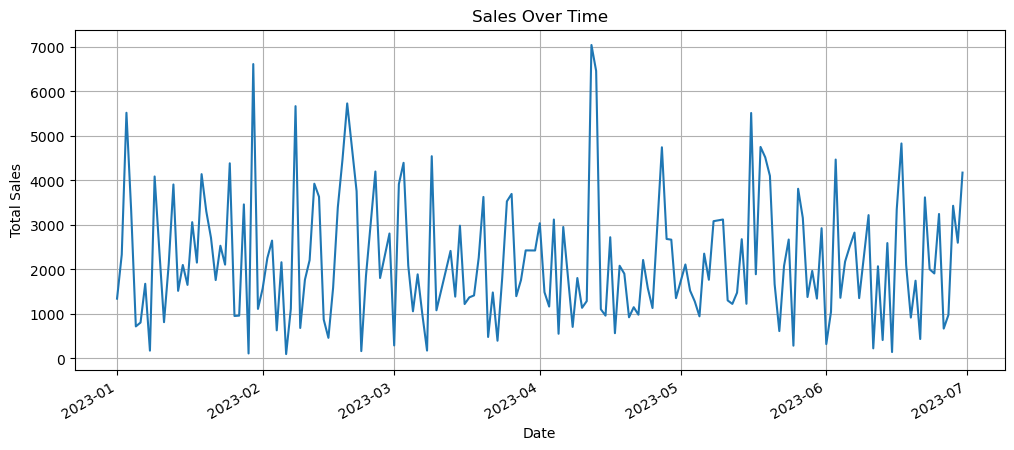

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#Time Series Plot
sales.groupby('Date')['Sales'].sum().plot(figsize=(12,5), title='Sales Over Time')
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


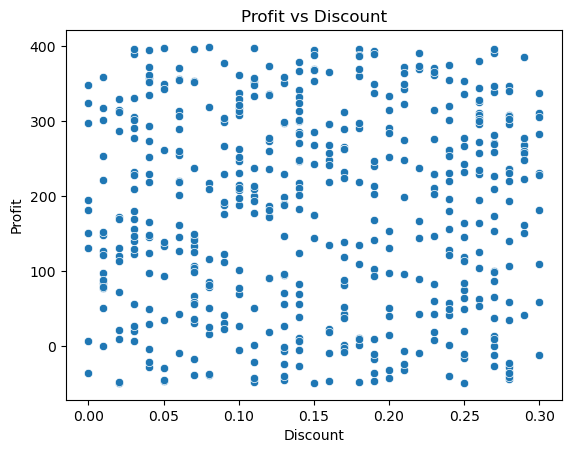

In [9]:
sns.scatterplot(x='Discount', y='Profit', data=sales)
plt.title("Profit vs Discount")
plt.show()


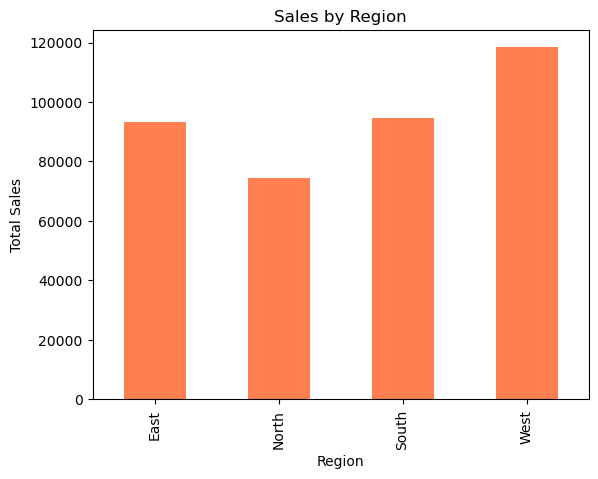

In [10]:
sales.groupby('Region')['Sales'].sum().plot(kind='bar', color='coral')
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = sales[['Profit', 'Discount']]
y = sales['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: -0.041025109337616605
MSE: 164508.6682805672
